In [24]:
from janome.tokenizer import Tokenizer
import re
import zipfile
import urllib.request
import os.path,glob

#ダウンロードしたいURLを入力する
URL = 'https://www.aozora.gr.jp/cards/001779/files/56671_ruby_59594.zip'
#分かち書き作成ファイル
WAKATI = 'wakachi_text.txt'

def main():
    download_text = download(URL)
    text = convert(download_text)

    #分かち書き作成
    write_wakachi_text(word_analyze(text))

def write_wakachi_text(results):
    write_file = WAKATI
    with open(write_file, 'w', encoding='utf-8') as fp:
        fp.write("\n".join(results))

def word_analyze(text):
    t = Tokenizer()
    results = []
    lines = text.split("\r\n")

    for line in lines:
        tokens = t.tokenize(line)
        r = []
        for token in tokens:
            w = token.surface
            ps = token.part_of_speech
            hinshi = ps.split(',')[0]
            r.append(w)
        rl = (" ".join(r)).strip()
        print(rl)
        results.append(rl)

    return results

def convert(download_text):
    binarydata = open(download_text, 'rb').read()
    text = binarydata.decode('shift_jis')

    # ルビ、注釈などの除去
    text = re.split(r'\-{5,}', text)[2]
    text = re.split(r'底本：', text)[0]
    text = re.sub(r'《.+?》', '', text)
    text = re.sub(r'［＃.+?］', '', text)
    text = text.strip()
    return text

def download(url):
 # データファイルをダウンロードする
 zip_file = re.split(r'/', url)[-1]

 if not os.path.exists(zip_file):
     print('Download URL')
     print('URL:',url)
     urllib.request.urlretrieve(url, zip_file)
 else:
     print('Download File exists')

 # フォルダの生成
 dir, ext = os.path.splitext(zip_file)
 if not os.path.exists(dir):
     os.makedirs(dir)

 # zipファイルの展開
 zip_obj = zipfile.ZipFile(zip_file, 'r')
 zip_obj.extractall(dir)
 zip_obj.close()

 # zipファイルの削除
 os.remove(zip_file)

 # テキストファイルの抽出
 path = os.path.join(dir,'*.txt')
 list = glob.glob(path)
 return list[0]

if __name__ == "__main__":
    main()

Download URL
URL: https://www.aozora.gr.jp/cards/001779/files/56671_ruby_59594.zip
歯車 の 音

冬 の 夜 、 月 の さえ た 晩 、 銀座 通り に 近い 橋 の たもと の 交番 に 、 ひとり の 警官 が 夜 の 見 はり について い まし た 。 一時 を とっくに すぎ た 真夜中 です 。
ひるま は 電車 や バス や 自動車 が 、 縦横 に はせ ちがう 大通り も 、 まるで いなか の 原っぱ の よう に さびしい の です 。 月 の 光 に 、 四 本 の 電車 の レール が キラキラ 光っ て いる ばかり 、 動く もの は 、 何 も あり ませ ん 。 東京 中 の 人 が 死に たえ て しまっ た よう な さびし さ です 。
警官 は 、 交番 の 赤い 電灯 の 下 に 、 じっと 立っ て 、 注意 ぶ かく あたり を 見 まわし て い まし た 。 濃い 口ひげ の 下 から 、 息 を する たび に 、 白い 煙 の よう な もの が 立ちのぼっ て い ます 。 寒 さ に 息 が こおる の です 。
「 オヤ 、 へん な やつ だ なあ 。 よっぱらい か な 。 」
警官 が 思わず ひとり ごと を つぶやき まし た 。
キラキラ 光っ た 電車 の レール の まんま ん 中 を 、 ひとり の 男 が 歩い て くる の です 。 青い 色 の 背広 に 、 青い 色 の ソフト を かぶっ た 大男 です 。 この 寒い のに 外套 も 着 て い ませ ん 。
その 男 の 歩き かた が 、 じつに へん な の です 。 お巡りさん が 、 よっぱらい か と 思っ た の も 、 むりはありません 。 しかし 、 よく 見る と 、 よっぱらい と も ちがい ます 。 右 ひだり に ヨロヨロ する の で は なく て 、 なんだか 両足 とも 義足 で も はめ て いる よう な 歩き かた な の です 。 人間 の 足 で 歩く の で は なく 、 機械 で でき た 足 で 歩い て いる よう な 感じ です 。
顔 は 帽子 の かげ に なっ て 、 よく 見え ま

一方 に は 戸 を しめきっ た 商家 が ならび 、 一方 の 線路 の 下 は 、 ずっと あき 地 に なっ て い ます 。 昔 は 倉庫 に 使わ れ て い た の です が 、 今 は 道路 と の さかい の 板 壁 も とりはらわ れ て 、 なん の 目ざわり に なる もの も なく 、 その へん いったい 、 一目 で 見 わたせ ます 。
三 人 は 念 の ため に 、 線路 の 下 に は いっ て 、 あちこち と さがし て 見 まし た が 、 あの 大男 が かくれ て いる よう な 場所 は 、 どこ に も あり ませ ん 。 怪物 は 影 も のこさ ず 消えうせ て しまっ た の です 。
それから また 、 手 わけ を し て 、 その へん いったい を くま なく さがしまわり まし た が 、 やはり なん の 手がかり も あり ませ ん 。
青銅 の 首 を 持ち 、 鉄 の 指 を 持つ 怪物 が 、 気体 と なっ て 蒸発 する はず は ない 。 では 風船 の よう に 、 から だ が 軽く なり 、 フワフワ と 空 へ まいあがっ た と でも いう の でしょ う か 。
あの 怪 談ず き の 青年 店員 は 、 よ つん ば い の 怪物 が 、 ちょうど 花火 から とびだし た 、 紙 製 の トラ の よう に 、 月夜 の 空 を 、 高く 高く とん で 行く の が 、 かすか に 見える よう な 気 が し まし た 。
さて 読者 諸君 、 この 青銅 の 首 を 持つ えたい の 知れ ぬ 怪物 は 、 そもそも 何者 でしょ う か 。 そいつ は なぜ よ つん ば い に なっ て 走る の でしょ う 。 ギリギリ という 歯ぎしり の よう な 音 は 、 何 を 意味 する の でしょ う 。 そいつ は いったいぜんたい 、 どうして 消えうせ た の でしょ う 。 また 、 懐中時計 ばかり を 、 あんなに たくさん 盗ん で 行っ た の は 、 なぜ でしょ う 。
これ に は みな 、 ちゃんと わけ が ある の です 。 この お話 は 怪談 で は あり ませ ん 。 おそろしい 知恵 を 持っ た 怪盗 と 、 名 探偵 

手塚 さん も じつは 数 日 前 から 見 はり 番 の こと を 考え て い た の でし た 。 ところが 、 ふたり が そんな そう だ ん を し た 、 ちょうど その 日 の 夕方 、 早く も 心配 が 事実 と なっ て 現われ 、 おそろしい こと が おこり まし た 。 昌一 君 が その 時庭 へ 出 た の は 、 まっか な 夕焼け 雲 が 美しかっ た から です 。 しかし 、 それ から つづい て 、 庭 の 奥 の うすぐらい 木立 ちの 中 へ 、 どうして はいっ て 行く 気 に なっ た の か 、 あと に なっ て 考え て み て も 、 よく わかり ませ ん 。 虫 が 知らせる という の でしょ う か 。 ただ なんと なく 、 そこ へ 行っ て み たく なっ た の です 。
手塚 家 の 庭 は 千 坪 も あっ て 、 築山 や 、 池 が あり 、 奥 の ほう は 森 の よう な 木 立ち に なっ て いる の です が 、 戦争 中 から 久しく 手 いれ を し ない ので 、 木立 ちの 下 に は 落葉 が たまっ て 、 歩く と ジュクジュク し て 、 気味 が わるい よう です 。
昌一 君 は 何 か に 引き つけ られる よう に 、 その うすら寒い 、 うす 暗い 木立 ちの 中 へ はいっ て 行き まし た 。
ひと かかえ 以上 も ある 大木 が 重なり あっ て 立っ て い て 、 五 六 歩 も ふみこむ と 、 もう 、 一 ｜ 間 さき が 見え ない ほど の 暗 さ です 。 大きな 森林 の 中 へ でも 迷い こん だ よう な 感じ な の です 。
ジュクジュク する 落葉 を ふん で 歩い て 行き ます と 、 自分 の 足音 の ほか に 、 なんだか へん な 音 が きこえ て き まし た 。 ギリギリ 、 ギリギリ という 、 貝がら で も すり あわ せ て いる よう な 音 です 。
虫 が 鳴い て いる の かしら 。 今 ごろ 虫 が 鳴く はず は ない が 、 へん だ な 。 オヤ 、 なんだか 人間 が 歯ぎしり し て いる よう な 音 だ ぞ 。
そこ まで 考える と 、 昌一 

しばらく し て 、 四 人 が 手 を つなぐ よう に し て 、 こわごわ 納戸 の ほう へ 近づい て いき ます と 、 ふたり の かけだす 音 を 聞きつけ た の か 、 納戸 の むこ う の ほう の 廊下 から も 、 手塚 さん と 書生 と が 、 あわただしく こちら へ やって来 まし た 。 その あと から ふたり の お巡りさん も つい て 来 ます 。
「 昌一 、 どう し た ん だ 。 何 か 見 た の か 。 」
昌一 君 は だまっ て 納戸 の 障子 を 指さし まし た 。 物 を いう の も こわい の です 。
おとうさん や お巡りさん たち も 、 障子 の ところ まで 近づい て 来 まし た 。 ふたり の お巡りさん は もう ピストル を 握っ て い ます 。 そして 昌一 君 の 指さす の を 見る と 、 その ピストル を 前 に かまえ て 、 いきなり 暗い 納戸 の 中 へ ふみこん で 行き まし た 。
昌一 君 は 、 今にも ピストル が 発射 さ れ て 、 とっく みあい が はじまる の で は ない か と 、 ビクビク し て い まし た が 、 納戸 の 中 から なん の 物音 も 聞こえ ず 、 とつぜん パッ と 電灯 が つき まし た 。 お巡りさん が スイッチ を 入れ た の です 。
それに 力 を え て 、 みんな が 開い た 障子 の 所 へ 行っ て 、 中 を のぞい て み ます と 、 そこ に は ふたり の お巡りさん が いる ばかり で 、 さっき たしかに 見 た 怪物 は 、 影 も 形 も ない の です 。 青銅 の 魔 人 は また し て も 、 煙 の よう に 消え て しまっ た の です 。
「 おかしい な 。 君たち 何 か 見 ちがえ た ん じゃ ない か ね 。 もし だれ か が この 部屋 に い た と すれ ば 、 逃げだす ひま は 、 まったく なかっ た ん だ から ね 。 自分 たち は あっち から 、 あんた たち は そっち から 、 はさみ うち に し た わけ だ ね 。 この 部屋 は 廊下 に 面し た 一方 口 で 、 三 方 は か べ に な

「 諸君 ―― おまえ たち の こと だ ぞ 、 諸君 は 親方 の 命令 を うけ て 、 モク ひろい （ たばこ ひろい の こと ） を 商売 に し て いる 。 そこ まで は いい ん だ よ 。 ところが きみ たち は 、 ときどき カッパ ライ も やっ て いる 。 ごまかし た って だめ だ 。 ぼく は ちゃんと 知っ て いる ん だ よ 。 しかし 、 諸君 は けっして 、 カッパ ライ なんか 、 やり たく て やっ てる ん じゃ ない 。 しかた が ない から やっ て いる ん だ ね 。 ね 、 そう だ ね 。 それ はね 、 きみ たち に は 、 おとうさん や おかあさん が い ない から だ 。 やしなっ て くれる 人 が ない から だ 。 だが ね 、 それ だ から と いっ て 、 こんな こと を いつ まで も つづけ て い ちゃあ 、 ろくな もん に なら ない 。 そこで 、 諸君 に そう だ ん が ある ん だ よ 。 どう だい 、 みんな 、 ぼく たち の やっ て いる 少年 探偵 団 の なか ま に なら ない か 。 」
「 少年 探偵 団 ってな ん だい ？ 」
チンピラ が 口々 に たずね まし た 。
「 まて まて 、 いま 、 説明 する よ 。 きみ たち は 名 探偵 明智 小五郎 を 知っ てる かい ？ 」
「 アケチ なんて やろ う 、 知ら ねえ な 。 」
「 ウン 、 知っ てる 、 知っ てる 。 いつか 、 三 ちゃん の あにい が いっ て た 。 すげ え 私立 探偵 だって ね 。 」
明智 の 名 を 知っ て いる もの が 、 五 六 人 あり まし た 。
「 よし 、 わかっ た 。 とにかく 、 その すげ え 私立 探偵 な ん だ よ 。 ぼく は その 明智 探偵 の 弟子 さ 。 少年 助手 っていう ん だ よ 。 ところで 、 その 弟子 の ぼく が 団長 に なっ て 、 小学生 や 中学生 で 少年 探偵 団 っていう の を 作っ て いる ん だ 。 悪者 を つかまえる ため に 、 子供 に できる こと を やっ て 、 世の中 の ため に なろ う って わけ な ん だ よ 

警官 が 煙突 へ のぼっ て 行っ て 、 怪人 を とらえる など は 、 とても できる こと で は あり ませ ん 。 足場 が わるい 上 に 、 相手 は どれ ほど 力 が ある か わから ない やつ です 。 そこで 中村 係長 は 消防署 に たのん で 、 怪物 めがけ て ホース の 水 を ぶっ かけ て もらう こと を 考えつき まし た 。 そう すれ ば 怪物 は 苦しまぎれ に おり て 来る だろ う と 思っ た の です 。 しかし 、 その 考え は まちがっ て い まし た 。 怪物 は けっして おり て こ なかっ た の です 。
自動車 ポンプ の エンジン が 動きだし 、 消防署 員 は ホース の 筒口 を とっ て 身 が まえ まし た 。 ホース から は おそろしい 音 を たて て 、 水 が ほとばしり 、 はるか の 空 の 怪物 は 真っ白 な 水しぶき に 包ま れ まし た 。
ポンプ の 水 は 煙突 の 上 の 怪物 を ふきとばす ほど の 力 が あり ます 。 しかし 、 つき おとし て 殺し て しまっ て は 、 なんにも なり ませ ん から 、 手 かげん を し て 、 ただ 顔 に 水しぶき を かけ て 苦しめる よう に し て いる の です 。
ところが 、 魔 人 は すこしも 苦しむ よう す が あり ませ ん 。 機械 人間 は 息 を し ない ので 、 いくら 水 を かけ られ て も へ いき な の でしょ う 。
消防 手 は もどかしく なっ て 、 だんだん 水 の かけ かた を はげしく し まし た 。 怪人 の 姿 が ユラユラ と ゆれる よう に 見え ます 。 ア 、 いけ ない 。 そんなに ひどく し たら 、 煙突 の 上 から 落ち て しまう 。 人々 が そう 思っ て 手 に 汗 を にぎっ た 時 は もう おそかっ た の です 。
ポンプ の 水 が 強 すぎ た の か 、 それとも 怪人 が わざと そうした の か 、 青銅 の から だ が 左右 に はげしく ゆれ た か と 思う と 、 もう 怪人 の 姿 は 煙突 の 上 から 消え て い まし た 。 しかし こんど は 煙 

「 じゃあ 、 あの 煙突 から おち た 魔 人 は 、 かえ だま の 人形 だっ た ん だ ね 。 いつのまに ほん もの と 入れ かわっ た ん だろ う 。 ちっとも わから なかっ た 。 」
ああ 、 なんと いう 奇妙 な 光景 でしょ う 。 ひとり は か べ の よう に おしろい を ぬっ た 、 とんがり 帽子 の 道化 も の 、 ひとり は 頭 から 足 の さき まで 青銅 で でき た 少年 、 その ふたり が 、 赤 ちゃ けた ランプ の 光 の 下 で 、 まるで 友だち の よう に 話し あっ て いる の です 。
「 エヘヘヽヽヽヽ 、 そこ が 、 それ 、 魔 人 国 の 魔法 という やつ さ 。 名 探偵 の 明智 に も とけ ない 謎 だ よ 。 チンピラ の おまえ なんか に わかっ て たまる もの か 。 」
「 フー ン 、 それ じゃあ 、 魔 人 が 煙 の よう に 消える の も やっぱり 魔法 な の かい ？ 」
「 そう と もさ 、 魔 人 国 第一歩 の 魔法 だ よ 。 その ほか 、 まだ いろいろ な 魔法 が ある 。 そのうち 、 きみ に も わかっ て くる よ 。 この 魔 人 国 へ 、 はいっ た からには 、 二度と ふたたび 、 しゃ ば に は 出 られ ない の だ から 、 きみ に は 何もかも 話し て きかせる が 、 ここ は 世界 に も 類 の ない りっぱ な 美術館 な ん だ ぜ 。 魔 人さま が 、 長い あいだ に 、 お あつめ に なっ た 、 ありとあらゆる 美術 品 が 、 七つ の 部屋 に ギッシリ つまっ て いる 。
その 中 に 時計 室 という 部屋 が あっ て ね 、 近ごろ は 、 その 部屋 に おさめる 時計 類 を 、 お 集め なさっ て いる の だ よ 。 世間 に 名 の きこえ た 、 めずらしい 時計 は 、 一つ のこら ず 手 に 入れよ う って わけ さ 。
今 、 その 七つ の 部屋 を 、 きみ に も 見せ て やる が ね 、 その 前 に 、 食堂 へ 行こ う 。 きみ は ずいぶん おなか が すい て いる はず だ から ね 。 」
道化 もの が 

ソッ と ついて行き ます と 、 魔 人 は 例 の 鉄 の 戸 を 鍵 で ひらい て 、 そのまま 外 の やみ の 中 へ 。 そして 、 鉄 の 戸 は また ピッタリ と しまっ て しまい まし た 。 小林 君 は すばやく 魔 人 の あと から ぬけだす つもり で い た の です が 、 とても そんな ひま は あり ませ ん 。 しかた が ない ので 、 しまっ た 戸 の 前 に 行っ て 、 未練 らしく 力いっぱい それ を おし て み まし た 。
すると 、 これ は どう でしょ う 。 鉄 の 戸 が スーッ と むこ う へ ひらい た で は あり ませ ん か 。 魔 人 は 鍵 を かける の を 忘れ て 行っ た の でしょ う か 。 それとも 、 もしか し たら 、 小林 君 が つけ て くる の を ちゃんと 知っ て い て 、 わざと 鍵 を かけ なかっ た の で は ない でしょ う か 。
しかし 、 小林 君 は そんな こと を 考える ゆとり など あり ませ ん 。 うれし さ の あまり 、 昌一 君 と 、 雪子 ちゃん の ね て いる 部屋 へ とん で いっ て 、 ふたり を おこし 、 手 を 引き あっ て 、 もと の 戸口 へ もどり まし た 。
三 人 は 胸 を ドキドキ さ せ ながら 、 入口 の むこ う が わ に 出る と 、 鉄 の 戸 を しめ まし た が 、 そこ は 真 の やみ で 、 どんな 場所 だ か すこし も わかり ませ ん 。 もし 魔 人 が まだ その へん に い たら 、 たいへん です から 、 しばらく 、 じっと 耳 を すまし て い まし た が 、 怪物 は もう 遠く へ 行っ た と みえ 、 何 の 物音 も きこえ ませ ん 。
そこで 小林 君 は 、 こんな 時 の 用意 に と 、 炊事 場 から マッチ を 持っ て 来 て い た ので 、 それ を シュッ と すっ て 、 あたり を 見 まわし まし た 。
おどろい た こと に は 、 一 メートル ばかり さき に 、 大きな 深い 穴 が ある の です 。
マッチ を すら なかっ たら 、 三 人 は その 穴 の

「 その 井戸 も じゅうぶん しらべ た ん だ よ 。 中 は 石 がけ に なっ て いる が 、 べつに 、 ぬけ 穴 は ない よう だ ぜ 。 」
「 シッ 、 大きな 声 を し ちゃ いけ ない 。 あいつ は この 下 に いる ん だ 。 きみ は ピストル は 持っ て いる だろ う ね 。 」
明智 は いよいよ ささやき声 です 。
「 ピストル を 手 に 持っ て い て くれ た ま え 。 い つ 攻撃 を 受ける かも しれ ない の だ から 。 」
それ を きく と 、 警部 は にわかに 緊張 し て 、 ピストル を サック から 取りだし まし た 。
「 見 た まえ 、 この 井戸 の 底 を 。 」
明智 が 懐中 電灯 で 井戸 の 中 を てらす と 、 中村 警部 が のぞきこん で 、 びっくり し て 顔 を あげ まし た 。
「 オヤッ 、 すっかり 水 が なくなっ て いる 。 ゆうべ のぞい た 時 も 、 その 前 に 見 た 時 も 、 この 井戸 の 底 に は ドス 黒い 水 が 、 いっぱい たまっ て い た ん だ が … … 。 」
「 そこ が 魔法 な ん だ よ 。 あいつ が 呪文 を となえる と 、 井戸 の 水 が スーッ と なくなっ て しまう 。 そして 、 ここ が 地下 の 密室 へ の 出入口 に なる という わけ だ よ 。 」
「 じゃあ 、 この 地 の 下 に 魔 人 の すみか が ある という の か 。 」
「 その とおり 、 手塚 さん も 、 昌一 君 も 、 雪子 ちゃん も 、 小林 君 も 、 みな この 地 の 底 へ つれこま れ て いる の さ 。 」
「 フー ン 、 おどろい た なぁ 。 手塚 さん の 庭 の 井戸 の 中 が 賊 の すみか だ なんて 、 なんと いう 大胆 不敵 な やつ だろ う 。 」
「 そこ が 魔法使い の 物 の 考え かた な ん だ 。 すべて ふつう の 人間 の 逆 を 行く の さ 。 だから 、 あたりまえ の 考え かた で は 、 あいつ の 秘密 を つかむ こと は でき ない 。 こっち も 逆 の 手 を 使わ なく て は だめ な ん だ よ 。

明智 は 、 なんだか ニヤニヤ 笑い ながら 、 黒 ビロウド の たれ幕 の 中 へ 、 スーッ と 、 はいっ て 行っ て しまい まし た 。
明智 の 意味 あり げ な ことば に 、 三 人 は 何事 が おこる の か と 、 だまりこん で 、 待っ て い ます と 、 やがて 、 ビロウド の 幕 が ユラユラ と ゆれ て 、 その 合わせ 目 から 、 パッ と 、 まっか な もの が 、 とびだし て 来 まし た 。 まるで 、 ビックリ 箱 から 、 道化 人形 が とびだす よう に 、 ひとり の 道化師 が あらわれ た の です 。
紅白 だ ん だら ぞ め の 、 ダブダブ の 服 、 トンガ リ 帽子 、 顔 は まっ白 に おしろい を ぬっ て 、 両方 の 頬 に 、 赤い 日の丸 が つい て い ます 。
こちら の 三 人 は 、 あっけ に とら れ て 、 ただ 目 を 見 はる ばかり 、 口 も きけ ない で い ます と 、 道化師 は 、 三 人 の 前 に 立ちはだかっ て 、 いきなり ゲラ ゲラ と 笑い だし た で は あり ませ ん か 。
「 ワッハハハヽヽヽヽ 、 どう だ ね 、 この 早わざ は 。 一 分間 に おしろい を ぬっ て 、 べ に を つけ て 、 道化 服 を 着 た 手ぎわ は 、 ハハハ … … 、 まだ わから ない か ね 。 ぼく だ よ 、 明智 だ よ 。 ちょっと 、 魔神 の 弟子 の 道化師 に 化け て 見 た の さ 。 」
「 なあんだ 、 きみ だっ た の か 。 びっくり さ せる じゃ ない か 。 そんな 変装 を し て 、 いったい 、 どう しよ う という の だ 。 」
中村 警部 は 、 おこっ た よう な 声 で 、 たずね ます 。
「 イヤ 、 ゆうべ 、 真夜中 に ね 、 ぼく は こういう ふう を し て 、 ある ところ で 、 大 はたらき を し た ん だ よ 。 道化師 に なりすまし て 、 敵 の う ら を かい た の だ よ 。 手塚 さん 、 わかり ます か 、 ぼく の やり かた が 。 探偵 という もの は 、 こういう 早わざ の 変装 も する の です

ぼく は どうか し て 、 魔 人 のる す の ま に 、 地下 の すみか へ はいり たい と 思っ た が 、 水 の なくなる の は ホン の すこし の あいだ だ から 、 とても 、 まとも に は はいれ ない 。 そこで 、 ぼく は 一 度 家 に かえって 、 じゅうぶん 用意 を し た うえ 、 その 次 の 真夜中 に 魔 人 の 出 て 行っ た あと を 見 すまし て 、 ぼく の 縄ばしご で 井戸 の 中 へ おり て 行っ た 。 むろん 、 水 を もぐる 決心 だ よ 。 ぴったり 身 に つい た ゴム 製 の シャツ と ズボン を 着 た の だ 。
ずいぶん つめたい 思い を し た が 、 井戸 の 底 に もぐっ て 、 横穴 を さがし 、 それ を ぬけ て 、 地下道 へ はいあがる の に は 、 一 分 も かから なかっ た 。 からだ を すっかり ふい て 、 ゴム 袋 に 入れ て 持っ て い た 服 を 身 に つけ 、 この 地下 の 部屋 部屋 を コッソリ 見 て まわっ た 。 そして 三 人 の 小人 の 魔 人 を 見つけ 、 三 人 を 見 はっ て いる の は 、 あの 道化師 ひとり だけ だ という こと を たしかめ た 。
ぼく は 物 かげ に かくれ て 、 道化師 の くせ や 、 口 の きき かた を 、 よく おぼえ て おい て から 、 ふい に おそいかかっ て 、 やつ を しばりあげ 、 戸棚 の 中 に おしこめ 、 道化 服 を うばっ て 、 ぼく が 道化師 に ばけ て しまっ た 。 戸棚 の 鍵 も その 道化 服 の ポケット に あっ た の だ よ 。
道化師 に ばけ た ぼく は 、 魔 人 の 正体 を たしかめる の に 二 日 かかっ た 。 ひじょうに むずかしい 仕事 だっ た 。 魔 人 は 、 たいてい 外 に 出 て い て 、 真夜中 に ちょっと 顔 を 見せる くらい の もの で 、 たしかめる のに 骨 が おれ た が 、 ぼく は とうとう 、 魔 人 の 秘密 を 見 やぶっ て しまっ た 。
小 魔 人 の 姿 に さ れ た 三 人 の 子供 たち に も 、 ぼく が 明

中村 警部 も 刑事 も むろん 怪人 二 十 面相 の こと は よく 知っ て い まし た 。 明智 の 口 から その 名 を きく と 、 パッ と 目 の 前 が ひらけ た よう に 、 すべて の なぞ が とけ まし た 。 怪人 二 十 面相 なら 、 どんな とっぴ な こと だって やり かね ない やつ です 。 青銅 の 魔 人 と は 、 あいつ に ふさわしい 思いつき で は あり ませ ん か 。
しかし 、 中村 警部 と 刑事 と が 、 二 十 面相 の ほう へ 、 とびかかっ て 行っ た 時 、 すばやい 二 十 面相 は 、 昌一 君 、 雪子 ちゃん の ふたり の 小 魔 人 を 両わき に かかえ て 、 いちはやく 走り だし て い まし た 。
立ちならぶ 仏像 の あいだ を 、 かいくぐっ て 、 部屋 の 一方 の すみ に 逃げ こむ と 、 ふたり の 子供 を 足 で おさえつけ て おい て 、 そこ の 石 がき の すき ま に 手 を 入れ 、 何 か 円筒 形 の もの を 取りだし 、 いきなり 、 それ を 頭 の 上 に さしあげ まし た 。
「 ワハハハヽヽヽ 、 明智 君 、 さすが に 、 まだ 腕 は にぶら なかっ た ね 。 だが 、 おれ は つかまら ない よ 。 いくら で も 奥の手 が 用意 し て ある ん だ 。 さあ 、 一 歩 でも 近づい て みろ 。 この 手榴弾 で 、 こっ ぱみじんだぞ ッ 。 」
どうして 手 に 入れ た の か 、 その 円筒 形 の もの は おそろしい 爆発 薬 だっ た の です 。 アア 、 あぶない 。 二 十 面相 が いのち を すて て かかれ ば 、 この 部屋 に いる 者 は 、 みな ごろ し に なっ て しまい ます 。
明智 小五郎 は おどろい て 逃げだし た でしょ う か ？ 　 イヤ 、 イヤ 、 逃げる どころか 、 名 探偵 は 二 十 面相 の 前 に 、 立ちはだかっ て 、 いきなり 笑い だし まし た 。 おかしく て たまらない という よう に 肩 を ゆすっ て 笑い だし た の です 。
「 アハハハヽヽヽヽ 、 きみ は 、 それ が 爆発 する と

その 林 の まん中 に 、 例 の 古 井戸 が あり ます 。 やがて 、 その 井戸 の 中 から 、 しずか に 姿 を あらわし た の は 、 名 探偵 明智 小五郎 でし た 。 明智 は 井戸 が わ を またい で 、 外 に 出る と 、 あたり を 見 まわし て から 、 強い 絹 ひも で 造っ た 縄ばしご を 、 たぐり あげ 、 それ を 小さく 丸め て 、 手 に 持っ て いる カバン の 中 へ 入れ まし た 。 へん な カバン です 。 なめ し 皮 の 袋 といった ほう が いい よう な 、 グニャグニャ し た 大きな カバン です 。 明智 が こんな カバン を 持っ て いる の を 、 今 まで だれ も 見 た こと が あり ませ ん 。 いったい 、 どう し た という の でしょ う 。
明智 の 姿 を 見る と 、 そば の 大きな 木 の かげ から 、 やはり ボロボロ に 破れ た カーキ 服 を 着 た 、 しかし 、 リンゴ の よう に つやつや し た 頬 の 、 かわいらしい 少年 が 出 て き まし た 。 そして 、 ささやき声 で 、 たずね ます 。
「 先生 、 うまく いき まし た か 。 」
「 アッ 、 小林 君 か 。 」
明智 は 、 なぜ か 、 びっくり し た よう に 、 立ちどまり まし た が 、 やがて 、 ニッコリ し て 、 答え まし た 。
「 ウン 、 万事 うまく いっ た 。 犯人 は 中村 警部 が 捕縛 し て 、 地下 室 に 監禁 し て ある 。 ぼく は 、 あいつ の 同類 の すみか が わかっ た ので 、 今 から 、 そこ へ かけつける の だ 。 きみ も いっしょ に 来 た ま え 。 」
明智 は へん な こと を いう の です 。 しかし 、 チンピラ 隊 の ひとり に なりすまし た 小林 少年 は 、 べつに うたがう よう す も なく 、 ハイ と 答え て 、 明智 の あと に したがい ます 。
カバン を さげ た 明智 は 、 小林 少年 を つれ て 、 広い 庭 を 母屋 の ほう へ あるい て 行き ます 。 する と 、 その 時 、 じつに ふしぎ な こ

建物 は 表 は 道路 に 面し 、 裏 は 隅田川 に のぞん で いる の です が 、 今 、 二 十 面相 の ぶらさがっ て いる の は 、 その 横 の が わ です 。 その が わに は 、 ほとんど 窓 が なく 、 中途 で ひも を 切ら れる 心配 が あり ませ ん 。
地上 の 人々 は 、 二 十 面相 の 空中 曲芸 に 気づい た よう です 。 足 の 下 から 、 ワーッ という 声 が 、 わきあがっ て 来 まし た 。 その 人々 の 姿 が 、 おもちゃ の よう に 小さく 見える ほど 、 高い の です 。 ひと足 ひと足 、 注意 ぶ かく 、 むすび 玉 に 指 を かけ て 、 おり て 行く の です が 、 空 ふく 風 に ひも が ゆれ て 、 と も すれ ば 、 スルスル と 、 すべりおち そう に なり ます 。 もし 手 を はなし たら 、 弾丸 の よう に 地上 に 墜落 し て 、 からだ は めちゃめちゃ に なっ て しまう でしょ う 。 身の毛 も よだつ 、 いのち がけ の 曲芸 です 。 二 十 面相 が ひも の はじ まで 、 おり きっ た ところ に は 、 地上 に は 明智 や 中村 警部 の 姿 も 見え まし た 。 ひも の はじ と いっ て も 、 地面 から 七 八 メートル の 空 に ある の です から 、 どう する こと も でき ませ ん 。
それ は 、 ちょうど 、 木 の 枝 から さ がっ た クモ が 、 風 に ゆれ て いる の と 同じ でし た 。 二 十 面相 は 絹 ひも の はじ に 、 しがみつい た 一 匹 の クモ の よう に 、 あぶなっかしい の です 。
見 て いる と 、 その クモ の 糸 は 、 だんだん 大きく ゆれ はじめ まし た 。 風 の ため ばかり で は あり ませ ん 。 二 十 面相 が 、 まるで ブランコ を こぐ よう に 、 大きく 、 いきおい を つけ て いる の です 。
やがて 、 ふしぎ な 空中 の ブランコ は 、 時計 の ふり この よう に 、 規則 ただしく 、 右 に 左 に 、 ヒューッ 、 ヒューッ と ゆれ 動き 、 その は 

In [5]:
import os
DATA_DIR = 'textfile2'
fname = '青銅の魔人.txt'
fname = os.path.join(DATA_DIR, fname)
with open(fname, encoding='utf-8') as f:
    text = f.read()
text

'歯車 の 音\n\n冬 の 夜 、 月 の さえ た 晩 、 銀座 通り に 近い 橋 の たもと の 交番 に 、 ひとり の 警官 が 夜 の 見 はり について い まし た 。 一時 を とっくに すぎ た 真夜中 です 。\nひるま は 電車 や バス や 自動車 が 、 縦横 に はせ ちがう 大通り も 、 まるで いなか の 原っぱ の よう に さびしい の です 。 月 の 光 に 、 四 本 の 電車 の レール が キラキラ 光っ て いる ばかり 、 動く もの は 、 何 も あり ませ ん 。 東京 中 の 人 が 死に たえ て しまっ た よう な さびし さ です 。\n警官 は 、 交番 の 赤い 電灯 の 下 に 、 じっと 立っ て 、 注意 ぶ かく あたり を 見 まわし て い まし た 。 濃い 口ひげ の 下 から 、 息 を する たび に 、 白い 煙 の よう な もの が 立ちのぼっ て い ます 。 寒 さ に 息 が こおる の です 。\n「 オヤ 、 へん な やつ だ なあ 。 よっぱらい か な 。 」\n警官 が 思わず ひとり ごと を つぶやき まし た 。\nキラキラ 光っ た 電車 の レール の まんま ん 中 を 、 ひとり の 男 が 歩い て くる の です 。 青い 色 の 背広 に 、 青い 色 の ソフト を かぶっ た 大男 です 。 この 寒い のに 外套 も 着 て い ませ ん 。\nその 男 の 歩き かた が 、 じつに へん な の です 。 お巡りさん が 、 よっぱらい か と 思っ た の も 、 むりはありません 。 しかし 、 よく 見る と 、 よっぱらい と も ちがい ます 。 右 ひだり に ヨロヨロ する の で は なく て 、 なんだか 両足 とも 義足 で も はめ て いる よう な 歩き かた な の です 。 人間 の 足 で 歩く の で は なく 、 機械 で でき た 足 で 歩い て いる よう な 感じ です 。\n顔 は 帽子 の かげ に なっ て 、 よく 見え ませ ん が 、 なんだか ドス 黒い 顔 で 、 それ が 少し も わき見 を し ない で 、 夢遊病 者 の よう に 正面 を むい た 

In [6]:
from nltk.tokenize import word_tokenize
word_tokens = word_tokenize(text) 
stop=['、', '。','「','」','…']
clean_text = [w for w in word_tokens if not w in stop]

clean_text = []

for w in word_tokens: 
    if w not in stop: 
        clean_text.append(w)
        
stop_ja=["あそこ","あっ","あの","あのかた","あの人","あり","あります","ある","あれ","い","いう","います","いる","う","うち","え","お","および","おり","おります","か","かつて","から","が","き","ここ","こちら","こと","この","これ","これら","さ","さらに","し","しかし","する","ず","せ","せる","そこ","そして","その","その他","その後","それ","それぞれ","それで","た","ただし","たち","ため","たり","だ","だっ","だれ","つ","て","で","でき","できる","です","では","でも","と","という","といった","とき","ところ","として","とともに","とも","と共に","どこ","どの","な","ない","なお","なかっ","ながら","なく","なっ","など","なに","なら","なり","なる","なん","に","において","における","について","にて","によって","により","による","に対して","に対する","に関する","の","ので","のみ","は","ば","へ","ほか","ほとんど","ほど","ます","また","または","まで","も","もの","ものの","や","よう","より","ら","られ","られる","れ","れる","を","ん","何","及び","彼","彼女","我々","特に","私","私達","貴方","貴方方","まし","ませ","ぼく","きみ","さん"]

filtered_word = [w for w in clean_text if not w in stop_ja]


for w in clean_text: 
    if w not in stop_ja: 
        filtered_word.append(w) 
        
filtered_text=' '.join(filtered_word)
#Morphological analysis
import MeCab
m = MeCab.Tagger('')
parsed = m.parse(filtered_text)
filtered2_word = [x.split('\t')[0] for x in parsed.splitlines()[:-1] if x.split('\t')[1].split(',')[0] not in ['助詞', '助動詞','接続詞']]

In [7]:
from collections import Counter
freq = Counter(filtered2_word)
freq.most_common

<bound method Counter.most_common of Counter({'人': 724, '魔': 484, '君': 458, '明智': 430, '中': 364, '小林': 356, '手塚': 276, '見': 254, '十': 254, '青銅': 226, '二': 224, '三': 206, '来': 202, '怪物': 186, '時': 176, 'そう': 168, 'いっ': 166, '音': 164, '中村': 160, '探偵': 158, '面相': 156, '顔': 148, '時計': 148, '一': 148, 'チンピラ': 138, '前': 132, '少年': 132, '姿': 132, '部屋': 130, 'ほう': 128, '手': 128, '人間': 122, 'わけ': 120, '警部': 120, 'しまっ': 118, 'ま': 114, '目': 112, '昌一': 112, '水': 108, 'あと': 106, '井戸': 106, 'やつ': 104, 'おそろしい': 104, 'いい': 104, '大きな': 102, '機械': 100, 'ふたり': 98, '穴': 96, '蔵': 96, '今': 92, '行き': 92, 'ひとり': 88, '見え': 88, '上': 88, 'どう': 84, 'ろ': 82, '気': 80, 'あいつ': 78, '思う': 78, '出': 76, '底': 76, '歯車': 74, '声': 74, 'しまい': 72, '行っ': 72, '煙突': 72, 'よく': 70, 'かけ': 70, 'もう': 70, '石': 68, 'さ': 68, '道化師': 68, '刑事': 68, '身': 66, '口': 66, '名': 66, '考え': 64, 'み': 64, '子供': 64, 'ドアー': 64, 'まるで': 62, 'かた': 62, 'まま': 62, 'あいだ': 62, 'え': 62, '家': 62, '警官': 60, '立っ': 60, '大': 60, 'おい': 60, '行く': 60, 'まっ': 60, '人形': 60, 

In [8]:
import nltk
from nltk.probability import FreqDist
freqdist = nltk.FreqDist(filtered2_word)

!pip install japanize-matplotlib
import matplotlib.pyplot as plt
import japanize_matplotlib

plt.figure(figsize=(16,5),)
freqdist.plot(50)

<Figure size 1600x500 with 1 Axes>

In [9]:
from nltk.probability import FreqDist
Fdist = FreqDist(filtered2_word)
Fdist['明智']

430

In [10]:
Fdist['青銅']

226

In [12]:
Fdist['明智']/len(word_tokens)*100

0.8545310015898252

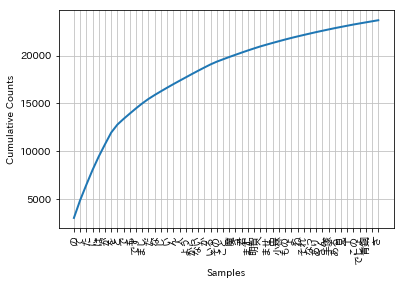

In [30]:
Fdist.plot(50, cumulative=True)

In [31]:
filtered_text=' '.join(filtered_word)

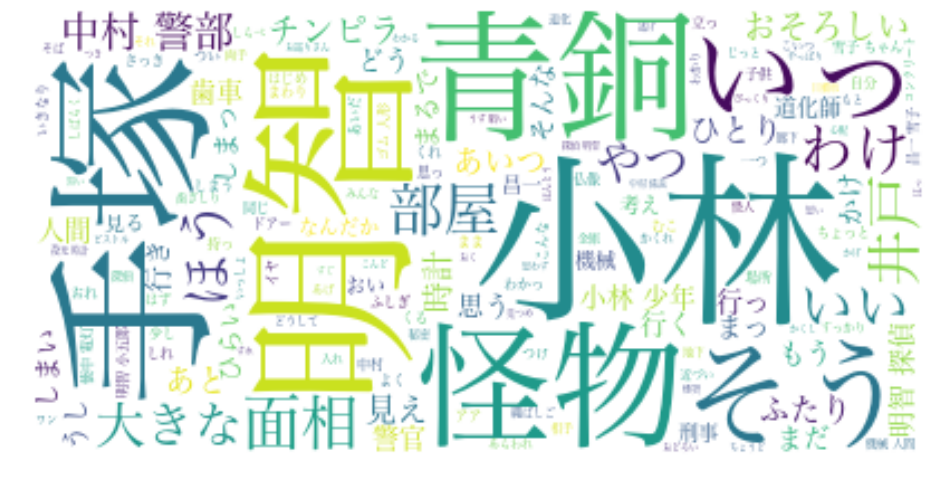

In [38]:
import os
os.path
!pip install wordcloud
import wordcloud
from wordcloud import WordCloud
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#Morphological analysis
import MeCab
m = MeCab.Tagger('')
parsed = m.parse(filtered_text)
filtered2_text = ' '.join([x.split('\t')[0] for x in parsed.splitlines()[:-1] if x.split('\t')[1].split(',')[0] not in ['助詞', '助動詞','接続詞']])
#助詞　postpositional word
#助動詞　auxiliary verb
#接続詞　conjunction
import matplotlib.pyplot as plt
wordcloud = WordCloud(font_path='/System/Library/Fonts/ヒラギノ明朝 ProN.ttc',max_words=150,background_color="white").generate(filtered2_text)
plt.figure(figsize=(16,12))
# plot wordcloud in matplotlib
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [39]:
wordcloud.to_file("textfile2/青銅の魔人.png")

In [16]:
lexical_diversity = len(set(word_tokens)) / len(word_tokens)
lexical_diversity

0.07631160572337042

In [17]:
len(set(word_tokens))

3840

In [18]:
len(word_tokens)

50320

In [22]:
parsed

'歯車\t名詞,一般,*,*,*,*,歯車,ハグルマ,ハグルマ\nの\t助詞,連体化,*,*,*,*,の,ノ,ノ\n音\t名詞,一般,*,*,*,*,音,オト,オト\n冬\t名詞,一般,*,*,*,*,冬,フユ,フユ\nの\t助詞,連体化,*,*,*,*,の,ノ,ノ\n夜\t名詞,副詞可能,*,*,*,*,夜,ヨル,ヨル\n、\t記号,読点,*,*,*,*,、,、,、\n月\t名詞,一般,*,*,*,*,月,ツキ,ツキ\nの\t助詞,連体化,*,*,*,*,の,ノ,ノ\nさえ\t動詞,自立,*,*,一段,連用形,さえる,サエ,サエ\nた\t助動詞,*,*,*,特殊・タ,基本形,た,タ,タ\n晩\t名詞,副詞可能,*,*,*,*,晩,バン,バン\n、\t記号,読点,*,*,*,*,、,、,、\n銀座\t名詞,固有名詞,地域,一般,*,*,銀座,ギンザ,ギンザ\n通り\t名詞,接尾,一般,*,*,*,通り,ドオリ,ドーリ\nに\t助詞,格助詞,一般,*,*,*,に,ニ,ニ\n近い\t形容詞,自立,*,*,形容詞・アウオ段,基本形,近い,チカイ,チカイ\n橋\t名詞,一般,*,*,*,*,橋,ハシ,ハシ\nの\t助詞,連体化,*,*,*,*,の,ノ,ノ\nたもと\t名詞,一般,*,*,*,*,たもと,タモト,タモト\nの\t助詞,連体化,*,*,*,*,の,ノ,ノ\n交番\t名詞,一般,*,*,*,*,交番,コウバン,コーバン\nに\t助詞,格助詞,一般,*,*,*,に,ニ,ニ\n、\t記号,読点,*,*,*,*,、,、,、\nひとり\t名詞,一般,*,*,*,*,ひとり,ヒトリ,ヒトリ\nの\t助詞,連体化,*,*,*,*,の,ノ,ノ\n警官\t名詞,一般,*,*,*,*,警官,ケイカン,ケイカン\nが\t助詞,格助詞,一般,*,*,*,が,ガ,ガ\n夜\t名詞,副詞可能,*,*,*,*,夜,ヨル,ヨル\nの\t助詞,連体化,*,*,*,*,の,ノ,ノ\n見\t動詞,自立,*,*,一段,連用形,見る,ミ,ミ\nはり\t動詞,非自立,*,*,五段・ラ行,連用形,はる,ハリ,ハリ\nについて\t助詞,格助詞,連語,*,*,*,について,ニツイテ,ニツイテ\nい\t動詞,自立,*,*,一段,連用形,いる,イ,イ\nまし\t助動詞,*,*,*,特殊・マス,連用形,ます,マシ,マ

In [23]:
import re
parts = [len(l.split()) for l in re.split(r'[?!。]', text) if l.strip()]

print(sum(parts)/len(parts))

20.859252823631625
